In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model


%matplotlib inline

plt.style.use('seaborn')

In [35]:
df_beer = pd.read_csv("Consumo_cerveja.csv", decimal=",", thousands=".")
df_beer.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900
5,2015-01-06,23.78,20.1,30.5,12.2,0,28218
6,2015-01-07,24.00,19.5,33.7,0.0,0,29732
7,2015-01-08,24.90,19.5,32.8,48.6,0,28397
8,2015-01-09,28.20,21.9,34.0,4.4,0,24886
9,2015-01-10,26.76,22.1,34.2,0.0,1,37937


In [36]:
df_beer.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


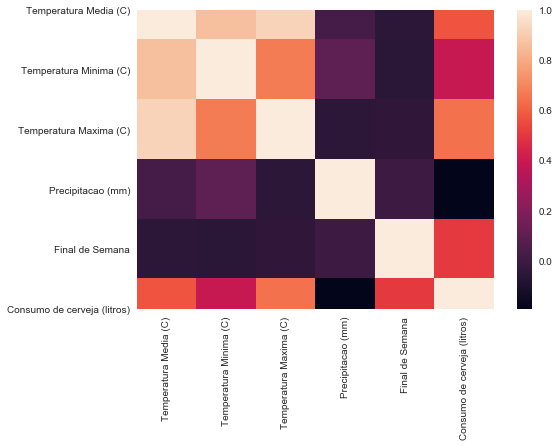

In [37]:
sns.heatmap(df_beer.corr())

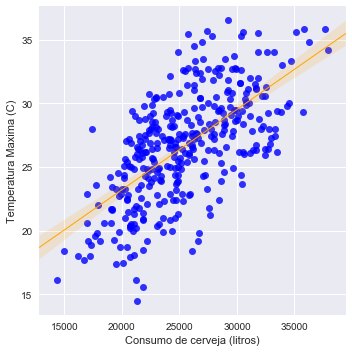

In [38]:
sns.lmplot("Consumo de cerveja (litros)", "Temperatura Maxima (C)", df_beer,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

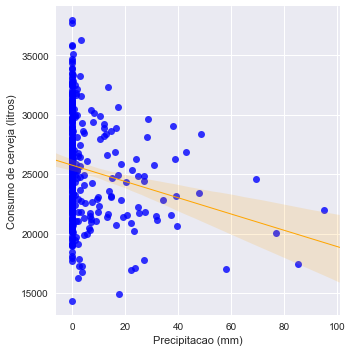

In [39]:
sns.lmplot("Precipitacao (mm)", "Consumo de cerveja (litros)", df_beer,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

In [100]:


feature_col_names = ['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']
predicted_class_names = ['Consumo de cerveja (litros)']

X = df_beer[feature_col_names].values
y = df_beer[predicted_class_names].values

split_test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [101]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('R2 score: %.2f' % lr_model.score(X_test, y_test))

R2 score: 0.74
R2 score: 0.74


In [103]:
predict_value = [[10, 20, 0]]
lr_model.predict(predict_value)

array([12176.1480362])